<h1 align="center";>
    <img style="float: right; padding-bottom:40px;" src="https://raw.githubusercontent.com/yaseen157/carpy/main/branding/logo_primary.png" width="300"/>
</h1>

# Quantity objects

#### 📖 <span style="color:#5a83ab">Learning Objectives</span>

In this notebook you will...

> ... learn what `Quantity` objects are.<br>
> ... understand how to create `Quantity` objects.<br>
> ... know how to manipulate `Quantity` objects to your benefit.

## NumPy arrays

One of the scientific Python community's most iconic packages is the [NumPy](https://github.com/numpy/numpy) library.
The fundamental n-dimensional array type `ndarray` is often used to manipulate arrays in a number of "dimensions".

Here's how you might create a one-dimensional array:

In [1]:
import numpy as np

velocities = [-2, 0, 1.5, 2.1]  # 1D data
arr1 = np.array(velocities)

print(f"arr1 = {repr(arr1)}\n")

print(f"type(arr1) = {type(arr1)}")
print(f"number of dimensions = {arr1.ndim}\n")

arr1 = array([-2. ,  0. ,  1.5,  2.1])

type(arr1) = <class 'numpy.ndarray'>
number of dimensions = 1



## CARPy Quantities

Users of NumPy will be comfortable with the idea of using a `Quantity` object in its place. The `Quantity` object *subclasses* the `ndarray` class, meaning in simple terms you can do a lot of the things a regular array can:

In [2]:
from carpy.utility import Quantity

qty1 = Quantity(velocities)

print(f"qty1 = {repr(qty1)}\n")

print(f"type(qty1) = {type(qty1)}")
print(f"number of dimensions = {qty1.ndim}\n")

qty1 = Quantity([-2. ,  0. ,  1.5,  2.1], no_unit)

type(qty1) = <class 'carpy.utility._unitconversion.Quantity'>
number of dimensions = 1



But `Quantity` objects really shine when users make use of its intelligent unit handling:

In [3]:
# Create Quantity objects with values and units
qty1 = Quantity(velocities, "m s^-1")
qty2 = Quantity(120, "lb")

# Manipulate your Quantity objects
qty3 = qty2 * qty1

# Your results are ready!
print(f"qty3 = {repr(qty3)}\n")

qty3 = Quantity([-108.8621688 ,    0.        ,   81.6466266 ,  114.30527724], kg m s^{-1})



So long as a unit is instantiated with the pattern `<unit_1> <unit_2> ... <unit_n>` (make sure to include the whitepsace between units), the values are converted into SI in the background, and then propagated to any child arrays.

## Specifics of reading `Quantity` values

### `repr()` vs `str()`

For your convenience, `Quantity` objects can be presented in two ways.
1. From `__repr__` - what you usually get when you type something into your Python console, i.e. a *representation* of the object. Your preferred code development environment will use the function `repr()` to obtain this string representation of your object.
2. From `__str__` - what you usually get when you print something using `print()`, i.e. the *string* version of the object. The `print()` function will use the function `str()` to obtain this pretty string of your object.

As a rule of thumb, `__repr__` tends to be (but is not always) a form of the object that the user can copy directly from console, paste it back into the console, and instantiate a brand new object with it. The `__str__` version is prettier to look at. Here's what that looks like for the original `ndarray` objects:

In [4]:
print("NumPy array presentation:")
print(f"__repr__ style: {repr(arr1)}")
print(f"__str__ style: {str(arr1)}\n")

NumPy array presentation:
__repr__ style: array([-2. ,  0. ,  1.5,  2.1])
__str__ style: [-2.   0.   1.5  2.1]



In most cases, something similar will happen for `Quantity` objects - that is unless the `Quantity` object you were using came from a non-SI unit:

In [5]:
print("CARPy Quantity presentation:")
print(f"__repr__ style: {repr(qty2)}")
print(f"__str__ style: {str(qty2)}\n")

CARPy Quantity presentation:
__repr__ style: Quantity([54.4310844], kg)
__str__ style: [120.] lb



This is primarily so when you are coding, the `__repr__` format presents you with numbers that make mathematical sense as you are manipulating them.
On the other hand, when you are presenting or writing data, you are more likely to end up with the `__str__` version.

### `.x`, `.to()`, and `.u`

If you need to access the original `ndarray` values inside of a `Quantity`, you can use the `.x` property:

In [6]:
print(f"qty2.x: {repr(qty2.x)}\n")

qty2.x: array([54.4310844])



<div class="alert alert-block alert-info"> <b>📝 Note:</b>
    Although we instantiated qty2 with 120 lbs, the <b><tt>.x</tt></b> property returned the value in SI base units of kilograms.
    The reason for this decision is that users who call methods that are incompatible with <b><tt>Quantity</tt></b> may still wish to access the values being represented.
    In such a case, it is far more likely that the user will want the SI values, as the more mathematically consistent unit system.
</div>

If this is unacceptable, you can make use of the `.to()` method which accepts a unit string as an argument:

In [7]:
# Present qty2 in units of stone
print(f"{qty2} is {qty2.to('st')} stone")

[120.] lb is [8.57142857] stone


Finally, if you want the original units with which a `Quantity` was established, use the `.u` property:

In [8]:
# Find out with what units qty3 was instantiated with
print(f"qty3.u = {repr(qty3.u)}\n")

qty3.u = kg m s^{-1}



<div class="alert alert-block alert-info"> <b>💡 Tip:</b>
If you would like to use <b><tt>Quantity</tt></b> objects in a computation and then plot the results in terms of the original units, <b><tt>.u</tt></b> and <b><tt>.to()</tt></b> will come in very handy!
</div>

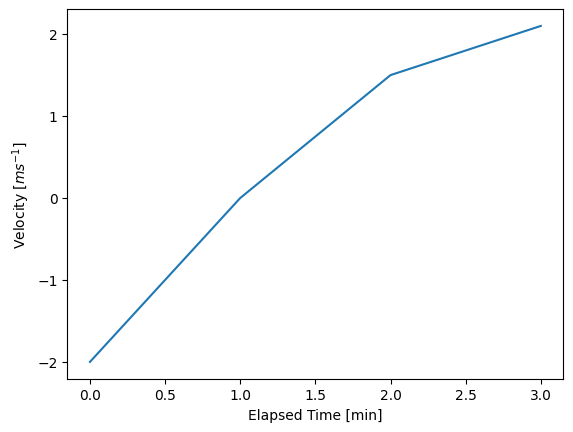

In [9]:
from matplotlib import pyplot as plt

t_elapsed = Quantity([0, 1, 2, 3], "min")
vs = Quantity(velocities, "m s^-1")

# Create a plot
fig, ax = plt.subplots()
ax.plot(t_elapsed.to(t_elapsed.u), vs)  # <-- plot time in minutes against velocity

# Label your plot as appropriate
ax.set_xlabel(f"Elapsed Time [{t_elapsed.u}]")
ax.set_ylabel(f"Velocity [${vs.u}$]")

plt.show()

## A quick chat about radians and steradians

`Quantity` does its best to preserve dimensionality of units through computations, but in some cases this is not possible.
For example, take the formula for force due to centripetal motion

$$F=ma \quad \text{with} \quad a = \frac{v^2}{r} \quad \longrightarrow \quad F = m\frac{v^2}{r}$$

Ostensibly, the units of force $F$ are the products of consitutent terms mass $m$, tangential speed $v$, and radius of gyration $r$

$$[kg \cdot ms^{-2}] = [kg] \times \frac{[m^2s^{-2}]}{[m]}$$

But the tangential speed $v$ is related to radius of gyration $r$ through $v = r \cdot \omega$, where $\omega$ is the angular velocity in radians per second.
We're left with the problem that 

$$[ms^{-1}] \neq [m] \cdot [rad \; s^{-1}] \quad \text{???}$$

in the case that SI-derived ratio "units" (radians, steradians) are treated with the same dimensional rules as the other base units.
The solution is that radians and steradians are treated as dimensionless, and have values equal to 1 - allowing them to appear and disappear at will.
As a result, `Quantity` objects may spawn these ghostly radian or steradian units during trigonometric operations, or delete them outright if the `Quantity` deems it inappropriate to propagate the unit:

In [10]:
# The rule for propagation is if it's not adding or subtracting, don't propagate it
omega = Quantity(60, "rpm")
radius = Quantity(5, "m")

v_t = radius * omega

print(f"{repr(v_t)} = {repr(radius)} x {repr(omega)}")

Quantity([31.41592654], m s^{-1}) = Quantity([5], m) x Quantity([6.28318531], s^{-1} rad)


In [11]:
# Users can force as many radians as they want into a unit (not sure why you'd want to!)
v_t.to("rad^68 m s^-1")

array([31.41592654])

In [12]:
# Trigonometry can spawn radian units - the result is angular after all
np.arctan(Quantity(1, None))

Quantity([0.78539816], rad)